# Проект: Исследование стартапов

* Автор: Федоровская Е.С.
* Дата: 28.02.2025

## Введение

* Описание проекта: 

  Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на 
  
покупку, развитие и последующую перепродажу перспективных стартапов.Для разработки модели бизнеса нужна информация. Чтобы 

выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных. Данные неполны, 

поэтому для ответа на вопросы необходимо аккуратно относиться к получаемым в процессе исследования значениям показателей и 

выводам и стараться оценивать их на возможные искажения.
  
* Цель проекта: 

1) Подготовить датасет и проверить данные, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

2) Предстоит принять решения:

а) по каким столбцам можно объединять данные из разных таблиц? 

б) можно ли доверять данным о сотрудниках стартапов и их образовании? 

в) что значат покупки за 0 или за 1 доллар? 

г) какова цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой?

д) как рассчитать и отобразить численные показатели и динамику?



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

# Описание данных 

Таблица acquisition: 

Содержит информацию о покупках одними компаниями других компаний:

* id — идентификатор покупки.
* acquiring_company_id — идентификатор покупающей компании.
* acquired_company_id — идентификатор покупаемой компании.
* term_code — варианты расчёта.
* price_amount — сумма сделки.
* acquired_at — дата сделки.

Таблица company_and_rounds:

Содержит информацию о компаниях и раундах финансирования:

* company ID — идентификатор компании.
* name — название компании.
* category code — категория области деятельности компании.
* status — статус компании.
* founded at — дата инвестирования.
* closed at — дата закрытия компании.
* domain — официальный сайт компании.
* network username — ник компании в сети.
* country code — код страны компании.
* investment rounds — число инвестиционных раундов.
* funding rounds — число раундов финансирования.
* funding total — сумма финансирования.
* milestones — вехи финансирования.
* funding round id — идентификатор этапа финансирования.
* company id — идентификатор компании.
* funded at — дата финансирования.
* funding round type — тип финансирования.
* raised amount — сумма финансирования.
* pre money valuation — предварительная денежная оценка.
* participants — число участников.
* is first round — является ли раунд первым.
* is last round — является раунд последним.

Таблица education: 

Содержит информацию об образовании сотрудника:

* id — идентификатор записи об образовании.
* person_id — идентификатор работника.
* instituition — название учебного заведения.
* graduated_at — дата получения образования.

Таблица people:

Содержит информацию о сотрудниках:

* id — идентификатор сотрудника.
* first_name — имя сотрудника.
* last_name — фамилия сотрудника.
* company_id — идентификатор компании.
* network_username — ник в социальных сетях.

Таблица degrees:

Содержит информацию о типе образования сотрудника:

* id — идентификатор записи.
* object_id — идентификатор сотрудника.
* degree_type — тип образования.
* subject — специальность.

Таблица fund:

Содержит информацию о фондах:

* id — идентификатор фонда.
* name — название фонда.
* category_code — категория области деятельности компании.
* founded_at — дата создания фонда.
* domain — сайт фонда.
* network_username — ник фонда в сети.
* country_code — код страны фонда.
* investment_rounds — число инвестиционных раундов.
* invested_companies — число профинансированных компаний.
* milestones — вехи финансирования.

Таблица investment:

Содержит информацию о раундах инвестирования:

* id — идентификатор этапа инвестирования.
* funding_round_id — идентификатор раунда инвестирования.
* company_id — индентификатор компании.
* funding_round_type — тип финансирования.
* fund_id — идентификатор фонда.

### 1.1. Вывод общей информации, исправление названия столбцов
* Загрузите все данные по проекту.


* Проверьте названия столбцов.


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [28]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
try:
    from phik import phik_matrix
except:
    !pip install phik
    from phik import phik_matrix

In [29]:
# Загружаем данные в переменные DataFrame
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

display(acquisition_df, company_and_rounds_df, people_df, education_df, degrees_df, fund_df, investment_df)
# Создаем список DataFrame:
dataframes = [acquisition_df, company_and_rounds_df, people_df, education_df, degrees_df, fund_df, investment_df]

# Создадим цикл и выведем информацию о каждом датафрейме:
for df_name in dataframes:
    print('Информация о датафрейме:')
    print(df_name.head())  # Выводим первые несколько строк
    print(df_name.info())  # Выводим информацию о типах данных и пропущенных значениях
    print('\n' + '-'*50 + '\n') # Пропишем разделитель

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...
11647,9997,Axel Johnson,1920-01-01,axeljohnson.com,NaN,USA,1,1,0
11648,9998,Liberty City Ventures,2012-07-01,libertycityventures.com,LCVentures,USA,5,5,0
11649,9999,CalSTRS,1913-07-01,calstrs.com,CalSTRS,USA,1,1,0
11650,11555,Haystack,2013-01-01,network.com::haystack_fund,haystack_fund,NaN,5,5,0


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5
...,...,...,...,...
61398,61399,57926,15847,173
61399,61400,57926,15847,1290
61400,61401,57926,15847,73
61401,61402,57942,70841,15098


Информация о датафрейме:
   id  acquiring_company_id  acquired_company_id term_code  price_amount  \
0   1                    11                   10       NaN      20000000   
1   7                    59                   72      cash      60000000   
2   8                    24                  132      cash     280000000   
3   9                    59                  155      cash     100000000   
4  10                   212                  215      cash      25000000   

  acquired_at  
0  2007-05-30  
1  2007-07-01  
2  2007-05-01  
3  2007-06-01  
4  2007-07-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amoun

* Датасет acquisition_df содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний. 

Данные представлены типами int 64 и object. Пропуски есть в столбцах term_code, acquired_at. Объём занимаемой памяти 441.1 KB.

* Датасет company_and_rounds_df содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.

Данные представлены типами float 64 и object. Пропуски есть в столбцах category code, founded ad, closed at, domain, network username, country code и др. Объём занимаемой памяти 36.6 MB.

* Датасет people_df содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.

Данные представлены типами float 64, int 64 и object. Пропуски есть в столбцах company_id, network_username. Объём занимаемой памяти 8.6 MB.

* Датасет education_df содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника.

Данные представлены типами int 64 и object. Пропуски есть в столбцах instituition, graduated_at. Объём занимаемой памяти 3.3 MB.

* Датасет degrees_df содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника.

Данные представлены типами int 64 и object. Пропуски есть в столбцах degree_type, subject. Объём занимаемой памяти 3.3 MB.

* Датасет fund_df содержит 9 столбцов и 11652 строк, в которых представлена информация о фондах.

Данные представлены типами int 64 и object. Пропуски есть в столбцах name, founded_at, domain, network_username, country_code. Объём занимаемой памяти 819.4 KB.

* Датасет investment_df содержит 4 столбца и 61403 строк, в которых представлена информация о раундах инвестирования.

Данные представлены типами int 64 и object. Пропусков в данном датафрейме нет. Объём занимаемой памяти 1.9 MB.

In [30]:
# Создадим цикл и выведем названия столбцов:
for df_name in dataframes:
    print('Названия столбцов:')
    print(df_name.columns)  # Выводим названия столбцов
    print('\n' + '-'*50 + '\n') # Разделитель между таблицами

Названия столбцов:
Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

--------------------------------------------------

Названия столбцов:
Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

--------------------------------------------------

Названия столбцов:
Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

--------------------------------------------------

Названия столбцов:
Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

-------------------------

In [31]:
# Все датафреймы, кроме company_and_rounds_df написаны в "змеином стиле". Поменяем названия столбцов:
company_and_rounds_df.rename(columns ={'company  ID': 'company_id',
                                       'category  code': 'category_code',                                                               
                                       'founded  at': 'founded_at',
                                       'closed  at': 'closed_at',                                                              
                                       'network  username': 'network_username',
                                       'country  code': 'country_code',
                                       'investment  rounds': 'investment_rounds', 
                                       'funding  rounds': 'funding_rounds',
                                       'funding  total': 'funding_total',
                                       'funding  round  id': 'funding_round_id', 
                                       'company  id': 'company_id_round', 
                                       'funded  at': 'funded_at',
                                       'funding  round  type': 'funding_round_type', 
                                       'raised  amount': 'raised_amount', 
                                       'pre  money  valuation': 'pre_money_valuation', 
                                       'is  first  round': 'is_first_round',
                                       'is  last  round': 'is_last_round'},                                                            
                                        inplace=True)

In [32]:
# Выведем названия столбцов:
display(company_and_rounds_df.columns)

Index(['company  ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

Названия столбцов приведены к стилю snake case.

In [6]:
# Столбец company ID, несмотря на преобразования не приводится к стилю snake case. 
# Прошу это учесть при проверке или указать мне, в чем ошибка.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [33]:
# Приведем тип данных float 64 к int 64 по всем датасетам:
company_and_rounds_df['investment_rounds'] = pd.to_numeric(company_and_rounds_df['investment_rounds'], downcast='integer')
company_and_rounds_df['funding_rounds'] = pd.to_numeric(company_and_rounds_df['funding_rounds'], downcast='integer')
company_and_rounds_df['milestones'] = pd.to_numeric(company_and_rounds_df['milestones'], downcast='integer')
company_and_rounds_df['funding_round id'] = pd.to_numeric(company_and_rounds_df['funding_round_id'], downcast='integer')
company_and_rounds_df['company_id_round'] = pd.to_numeric(company_and_rounds_df['company_id_round'], downcast='integer')
company_and_rounds_df['participants'] = pd.to_numeric(company_and_rounds_df['participants'], downcast='integer')
company_and_rounds_df['is_first_round'] = pd.to_numeric(company_and_rounds_df['is_first_round'], downcast='integer')
company_and_rounds_df['is_last_round'] = pd.to_numeric(company_and_rounds_df['is_last_round'], downcast='integer')
display(company_and_rounds_df.dtypes)

company  ID            float64
name                    object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
network_username        object
country_code            object
investment_rounds      float64
funding_rounds         float64
funding_total          float64
milestones             float64
funding_round_id       float64
company_id_round       float64
funded_at               object
funding_round_type      object
raised_amount          float64
pre_money_valuation    float64
participants           float64
is_first_round         float64
is_last_round          float64
funding_round id       float64
dtype: object

In [34]:
# Преобразование по датасету acquisition_df:
acquisition_df['id'] = pd.to_numeric(acquisition_df['id'], downcast = 'integer')
acquisition_df['acquiring_company_id'] = pd.to_numeric(acquisition_df['acquiring_company_id'], downcast = 'integer')
acquisition_df['acquired_company_id'] = pd.to_numeric(acquisition_df['acquired_company_id'], downcast = 'integer')
acquisition_df['price_amount'] = pd.to_numeric(acquisition_df['price_amount'], downcast = 'integer')
display(acquisition_df.dtypes)

id                       int16
acquiring_company_id     int32
acquired_company_id      int32
term_code               object
price_amount             int64
acquired_at             object
dtype: object

In [35]:
# Преобразование по датасету people_df:
people_df['id'] = pd.to_numeric(people_df['id'], downcast = 'integer')
people_df['company_id'] = pd.to_numeric(people_df['company_id'], downcast = 'integer')
display(people_df.dtypes)

id                    int32
first_name           object
last_name            object
company_id          float64
network_username     object
dtype: object

In [36]:
# Преобразование по датасету education_df:
education_df['id'] = pd.to_numeric(education_df['id'], downcast = 'integer')
education_df['person_id'] = pd.to_numeric(education_df['person_id'], downcast = 'integer')
display(education_df.dtypes)

id               int32
person_id        int32
instituition    object
graduated_at    object
dtype: object

In [37]:
# Преобразование по датасету degrees_df:
degrees_df['id'] = pd.to_numeric(degrees_df['id'], downcast = 'integer')
display(degrees_df.dtypes)

id              int32
object_id      object
degree_type    object
subject        object
dtype: object

In [12]:
# При преобразовании float в int в датасетах people_df и company_and_rounds_df почему то не изменяются некоторые данные. 
# На ошибки проверила, перезапустила. Все также. Прошу учесть или указать на ошибку.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [38]:
# Приведем даты, которые стоят в типе object, в тип datetime:
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at']) 
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'])
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])
display(company_and_rounds_df.dtypes)

acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
display(acquisition_df.dtypes)

education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])
display(education_df.dtypes)

fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])
display(fund_df.dtypes)

company  ID                   float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_round              float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
funding_round id              float64
dtype: object

id                               int16
acquiring_company_id             int32
acquired_company_id              int32
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

id                       int32
person_id                int32
instituition            object
graduated_at    datetime64[ns]
dtype: object

id                             int64
name                          object
founded_at            datetime64[ns]
domain                        object
network_username              object
country_code                  object
investment_rounds              int64
invested_companies             int64
milestones                     int64
dtype: object

Типы данных в нужных столбцах датасетов изменены.

In [39]:
# Создадим цикл и выведем количество пропусков в данных:
for df_name in dataframes:
    print('Количество пропусков:')
    print(df_name.isna().sum())  # Выведем количество пропусков
    print('\n' + '-'*50 + '\n') # Разделитель между таблицами

Количество пропусков:
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

--------------------------------------------------

Количество пропусков:
company  ID               302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_round       164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
funding_round id       164846
dtype: int64

------------

In [40]:
# Создадим цикл и посчитаем долю пропусков в данных:
for df_name in dataframes:
    print('Доля пропусков:')
    print(df_name.isna().sum() / len(df_name) * 100)  # Выведем долю пропусков
    print('\n' + '-'*50 + '\n') # Разделитель между таблицами

Доля пропусков:
id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

--------------------------------------------------

Доля пропусков:
company  ID             0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id_round       75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_

В ходе первичной обработки данных были загружены необходимые библиотеки для дальнейшей работы. Выведена информация по всем датасетам методами info() и head(). Данные датасета company_and_rounds_df приведены к стилю snake_case. Изменены типы данных в столбцах, которые хранят значения даты и времени там, где это необходимо. Посчитано количество и доля пропусков. Большинство пропусков сосредоточилось в  отдельных столбцах датасетов acquisition_df, people_df, company_and_rounds_df - по 98, 84, 80 % соответственно. Отсутствуют пропуски в данных  дополнительного датасета investment_df.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

        median_raised_amount  round_count
year                                     
1999.0             2000000.0           76
2000.0             4200000.0          125
2001.0             3000000.0           96
2002.0             4200000.0          116
2003.0             3000000.0          159
2004.0             5000000.0          291
2005.0             5500000.0         1633
2006.0             5000000.0         2436
2007.0             3973320.0         3279
2008.0             3110000.0         3774
2009.0             2000000.0         4151
2010.0             1602500.0         6221
2011.0             1200000.0         9204
2012.0             1000000.0         9970
2013.0             1200000.0        11072


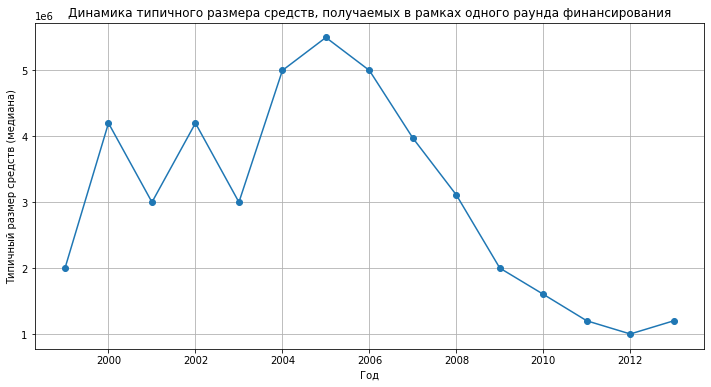

In [41]:
# Извлечем год из столбца funded_at:
company_and_rounds_df['year'] = company_and_rounds_df['funded_at'].dt.year

# Создадим сводную таблицу:
pivot_table = company_and_rounds_df.pivot_table(
    index='year',
    values='raised_amount',
    aggfunc=['median', 'count']  # Используем median вместо mean как более устойчивую метрику для "типичного размера"
)

# Переименуем столбцы:
pivot_table.columns = ['median_raised_amount', 'round_count']

# Отфильтруем по количеству раундов:
filtered_table = pivot_table[pivot_table['round_count'] > 50]

# Выведем получившуюся таблицу:
print(filtered_table)

# Построим график. Создадим контейнер графика matplotlib и зададим его размер:
plt.figure(figsize=(12, 6))
# Зададим необходимые параметры:
plt.plot(filtered_table.index, filtered_table['median_raised_amount'], marker='o')
plt.title('Динамика типичного размера средств, получаемых в рамках одного раунда финансирования')
# Настраиваем оформление графика:
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (медиана)')
# Добавляем сетку графика:
plt.grid(True)
# Выводим график:
plt.show()

Максимальный типичный размер средств был в 2005 году - 5500000.0. В 2013 году типичный размер средств составил 1200000.0, а общее число раундов равно 11072. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Количество компаний до объединения с degrees_df: 22922

Статистические показатели доли сотрудников без информации об образовании (до объединения с degrees_df):
count    6.000000
mean     0.320068
std      0.255106
min      0.132166
25%      0.145334
50%      0.175056
75%      0.527984
max      0.657078
Name: education_data_available, dtype: float64


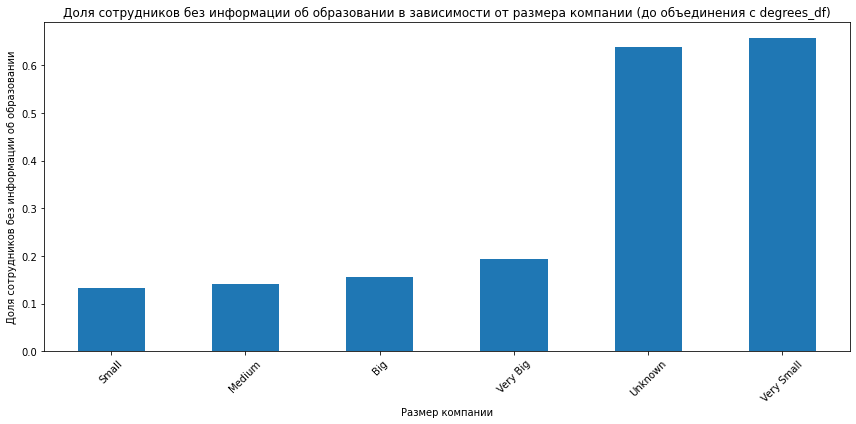


Количество компаний после объединения с degrees_df: 22922

Статистические показатели доли сотрудников без информации об образовании (после объединения с degrees_df):
count    6.000000
mean     0.243244
std      0.257047
min      0.065150
25%      0.073260
50%      0.096653
75%      0.383014
max      0.657078
Name: education_data_available, dtype: float64


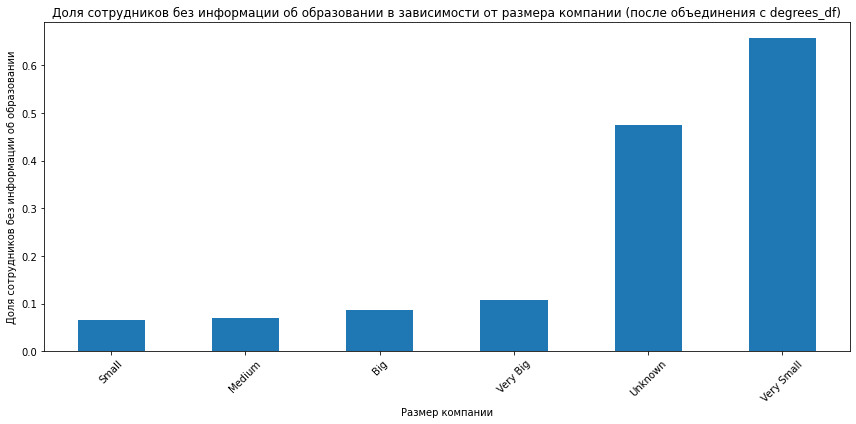

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id_x                      267694 non-null  int32         
 1   first_name                267689 non-null  object        
 2   last_name                 267693 non-null  object        
 3   company_id                44789 non-null   float64       
 4   network_username          50775 non-null   object        
 5   id_y                      109056 non-null  float64       
 6   person_id                 109056 non-null  float64       
 7   instituition              109002 non-null  object        
 8   graduated_at              57691 non-null   datetime64[ns]
 9   company_size              44789 non-null   float64       
 10  company_size_group        267694 non-null  object        
 11  education_data_available  267694 non-null  bool          
dtypes:

In [42]:
# Объединение people_df и education_df:
people_education_df = people_df.merge(education_df, left_on='id', right_on='person_id', how='left')

# Количество компаний до объединения с degrees_df:
num_companies_before = people_education_df['company_id'].nunique()
print(f"Количество компаний до объединения с degrees_df: {num_companies_before}")

# Расчет количества сотрудников в каждой компании:
company_employee_counts = people_education_df.groupby('company_id')['person_id'].transform('count')
people_education_df['company_size'] = company_employee_counts

# Функция для определения размера компании:
def get_employee_group(num_employees):
    if pd.isna(num_employees):
        return 'Unknown'
    bins = [0, 2, 10, 30, 100, 350, np.inf]
    labels = ['Very Small', 'Small', 'Medium', 'Big', 'Very Big', 'Large']
    return pd.cut([num_employees], bins=bins, labels=labels, right=False)[0]

# Применение функции для определения размера компании:
people_education_df['company_size_group'] = people_education_df['company_size'].apply(get_employee_group)

# Определение наличия информации об образовании:
people_education_df['education_data_available'] = people_education_df['instituition'].isna()

# Группировка по размеру компании и расчет доли сотрудников без информации об образовании:
education_data_share = people_education_df.groupby('company_size_group')['education_data_available'].mean().sort_values()

# Статистические показатели:
print("\nСтатистические показатели доли сотрудников без информации об образовании (до объединения с degrees_df):")
print(education_data_share.describe())

# Построение графика (до объединения с degrees_df):
plt.figure(figsize=(12, 6))
education_data_share.plot(kind='bar')
plt.title('Доля сотрудников без информации об образовании в зависимости от размера компании (до объединения с degrees_df)')
plt.xlabel('Размер компании')
plt.ylabel('Доля сотрудников без информации об образовании')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Удалим 'p' в каждом значении столбца object_id, чтобы данные можно было привести в числовой тип данных 
# и выполнять с ним действия в дальнейшем:

degrees_df['object_id'] = degrees_df['object_id'].str.replace('p', '', regex=False)

degrees_df['object_id'] = degrees_df['object_id'].str.replace(':', '', regex=False)

degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], downcast = 'integer')

# Объединение с degrees_df:
degrees_people_education_df = people_education_df.merge(degrees_df, left_on='person_id', right_on='object_id', how='left')

# Количество компаний после объединения с degrees_df:
num_companies_after = degrees_people_education_df['company_id'].nunique()
print(f"\nКоличество компаний после объединения с degrees_df: {num_companies_after}")

# Определение наличия информации об образовании после объединения с degrees_df:
degrees_people_education_df['education_data_available'] = degrees_people_education_df['instituition'].isna()

# Группировка по размеру компании и расчет доли сотрудников без информации об образовании:
education_data_share_after = degrees_people_education_df.groupby('company_size_group')['education_data_available'].mean().sort_values()

# Статистические показатели после объединения с degrees_df:
print("\nСтатистические показатели доли сотрудников без информации об образовании (после объединения с degrees_df):")
print(education_data_share_after.describe())

# Построение графика (после объединения с degrees_df):
plt.figure(figsize=(12, 6))
education_data_share_after.plot(kind='bar')
plt.title('Доля сотрудников без информации об образовании в зависимости от размера компании (после объединения с degrees_df)')
plt.xlabel('Размер компании')
plt.ylabel('Доля сотрудников без информации об образовании')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Выведем информацию:
people_education_df.info()
degrees_people_education_df.info()


В ходе проведенных расчётов и построения графиков выяснилось, что количество компаний до и после объединения с датасетом degrees_df осталось одинаковым - 22922. 
Статистические показатели незначительно отличаются до и после объединения, кроме показателей 'count' и 'max'.
Присоединение датасета degrees_id осуществлялось по столбцам person_id и object_id. Объём занимаемой памяти до и после объединения составил 23.7 MB и 44.2 MB соответственно. Данные представлены типами bool, datetime, float64, int32, object. 
Доля сотрудников без информации об образовании в зависимости от размера компании (до объединения с degrees_df) была чуть выше у компаний small, medium, big, very big - около 0.15 - 0.2.
Доля сотрудников без информации об образовании в зависимости от размера компании (после объединения с degrees_df) была чуть ниже, чем у компаний small, medium, big, very big до объединения с degrees_df - около 0.08 - 0.11.
Самая большая доля сотрудников без информации об образовании в зависимости от компании наблюдается у компаний размера very small и до, и после объединения - около 0.68.
Границы групп были выбраны на основании визуального анализа столбчатой диаграммы распределения количества сотрудников по компаниям.
Большинство компаний имеют небольшое количество сотрудников без информации об образовании, поэтому была выделена группа "very small" для компаний до 2 сотрудников.
Остальные группы были определены таким образом, чтобы отражать компании среднего, крупного и очень крупного размера,
и при этом обеспечить достаточное количество компаний в каждой группе для статистически значимого анализа.
Таким образом, деление получилось логичным и учитывает особенности распределения данных.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [43]:
# Получаем уникальные значения из people_df, fund_df, company_and_rounds_df:
unique_usernames_people = people_df['network_username'].dropna().unique()  # Отбрасываем NaN
unique_usernames_fund = fund_df['network_username'].dropna().unique() # Отбрасываем NaN
unique_usernames_company_and_rounds = company_and_rounds_df['network_username'].dropna().unique()  # Отбрасываем NaN

# Находим общие значения (пересечение):
common_usernames = set(unique_usernames_people) & set(unique_usernames_fund) & set(unique_usernames_company_and_rounds)
common_usernames = list(common_usernames)

# Считаем, сколько раз каждое общее значение встречается в каждом DataFrame:
counts_people = people_df['network_username'].value_counts()
counts_fund = fund_df['network_username'].value_counts()
counts_company_and_rounds = company_and_rounds_df['network_username'].value_counts()

# Выводим результаты:
print("Уникальные имена пользователей в people_df:", len(unique_usernames_people))
print("Уникальные имена пользователей в fund_df:", len(unique_usernames_fund))
print("Уникальные имена пользователей в company_and_rounds_df:", len(unique_usernames_company_and_rounds))
print("Количество общих имен пользователей:", len(common_usernames))
print("Список общих имен пользователей:", common_usernames)


print("\nКоличество появлений общих имен в people_df:")
for username in common_usernames:
    if username in counts_people.index:
        print(f"{username}: {counts_people[username]}")
    else:
        print(f"{username}: 0")

print("\nКоличество появлений общих имен в fund_df:")
for username in common_usernames:
    if username in counts_fund.index:
        print(f"{username}: {counts_fund[username]}")
    else:
        print(f"{username}: 0")
        
print("\nКоличество появлений общих имен в company_and_rounds_df:")
for username in common_usernames:
    if username in counts_company_and_rounds.index:
        print(f"{username}: {counts_company_and_rounds[username]}")
    else:
        print(f"{username}: 0")

# Оценка пригодности для объединения:
if len(common_usernames) > 0:
    print("\nОбнаружены общие значения 'network_username' между people_df, education_df и company_and_rounds_df.")
    print("Необходимо дополнительно оценить, достаточно ли этих общих значений")
    print("и насколько они уникальны в пределах каждого DataFrame для надежного объединения.")

    # Дополнительная проверка: Уникальность username в каждом датафрейме
    is_username_unique_people = people_df['network_username'].is_unique
    is_username_unique_fund = fund_df['network_username'].is_unique
    is_username_unique_company_and_rounds = company_and_rounds_df['network_username'].is_unique

    print(f"\nУникален ли 'network_username' в people_df? {is_username_unique_people}")
    print(f"Уникален ли 'network_username' в fund_df? {is_username_unique_fund}")
    print(f"Уникален ли 'network_username' в company_and_rounds_df? {is_username_unique_company_and_rounds}")

    if not is_username_unique_people or not is_username_unique_fund or not is_username_unique_company_and_rounds:
        print("\nВнимание! 'network_username' не уникален в одном, двух или всех DataFrame.")
        print("Объединение по этому полю может привести к дублированию или некорректным данным.")
        print("Рекомендуется использовать составной ключ или другой метод объединения.")
    else:
        print("\n'network_username' уникален во всех датафреймах.  Можно рассматривать объединение по этому полю.")
else:
    print("\nНе обнаружено общих значений 'network_username' между people_df, fund_df и company_and_rounds_df.")
    print("Столбец 'network_username' не подходит для объединения этих трех DataFrame.")

Уникальные имена пользователей в people_df: 38421
Уникальные имена пользователей в fund_df: 2098
Уникальные имена пользователей в company_and_rounds_df: 79571
Количество общих имен пользователей: 7
Список общих имен пользователей: ['yumedeals3', 'switchcommerce', 'tefdigital', 'boonseo', 'dgillesfr', 'priceride', 'taniablackalln']

Количество появлений общих имен в people_df:
yumedeals3: 1
switchcommerce: 1
tefdigital: 1
boonseo: 1
dgillesfr: 1
priceride: 1
taniablackalln: 1

Количество появлений общих имен в fund_df:
yumedeals3: 1
switchcommerce: 1
tefdigital: 1
boonseo: 1
dgillesfr: 1
priceride: 1
taniablackalln: 1

Количество появлений общих имен в company_and_rounds_df:
yumedeals3: 1
switchcommerce: 1
tefdigital: 1
boonseo: 1
dgillesfr: 1
priceride: 1
taniablackalln: 1

Обнаружены общие значения 'network_username' между people_df, education_df и company_and_rounds_df.
Необходимо дополнительно оценить, достаточно ли этих общих значений
и насколько они уникальны в пределах каждого Da

Строка list(common_usernames) выведет список общих имен пользователей, найденных во всех DataFrame. 
Если бы количество общих имен пользователей было равно 0, то это означало бы, что нет ни одного network_username, который бы встречался одновременно в people_df, fund_df и company_and_rounds_df. В этом случае, объединение по network_username невозможно.
Если бы количество общих имен пользователей было > 0, то стоило бы оценить размер этого числа.
  1)  Если количество общих имен очень мало по сравнению с общим количеством уникальных имен в каждом DataFrame, то объединение, вероятно, будет бесполезным, так как соединятся только несколько строк.
  
  2)  Если количество общих имен значительно, то network_username может быть полезным для объединения. Однако, важно убедиться, что network_username является достаточно уникальным идентификатором.
Если network_username не является уникальным в первом, втором или всех DataFrame, это означает, что у нескольких людей/записей в одном DataFrame может быть одинаковый network_username. Объединение в этом случае приведет к дублированию данных.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [51]:
# Разделяем датафрейм company_and_rounds_df на две части:
# Часть до столбца 'milestones' включительно
company_df = company_and_rounds_df.loc[:, :'milestones']

# Часть после столбца 'funding_round_id' включительно:
funding_rounds_df = company_and_rounds_df.loc[:, 'funding_round_id':]

In [52]:
# Выведем информацию о разделенном датасете company_df:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company  ID        217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [53]:
# Проверяем дубликаты в датафрейме company_df:
company_df.duplicated().sum()

21220

In [54]:
# удалим дубликаты в датафрейме company_df:
company_df.drop_duplicates()

,company ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


In [55]:
# Выведем информацию о разделенном датасете funding_rounds_df:
funding_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_round     52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funding_round id     52928 non-null  float64       
 10  year                 52680 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 18.3+ MB


In [56]:
# Проверяем дубликаты в датафрейме funding_rounds_df:
funding_rounds_df.duplicated().sum()

164845

In [57]:
# удалим дубликаты в  датафрейме funding_rounds_df:
funding_rounds_df.drop_duplicates()

,funding_round_id,company_id_round,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funding_round id,year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,888.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,889.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2312.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,1644.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,56454.0,2011.0
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,56542.0,2011.0
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,56543.0,2012.0
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,56928.0,2013.0


Датасет company_and_rounds_df был поделен на 2 датафрейма: company_df и funding_rounds_df. Также была выведена информация по каждому датасету, найдены дубликаты и удалены. 


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.